# Merge Data

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import re

In [3]:
pd.__version__

'1.5.3'

In [5]:
import os

directory = 'D:\Dafa\Jupyter\gemasyik\data_merdeka_belajar'

df = pd.DataFrame()

for filename in os.scandir(directory):
    if filename.is_file():
        temp = pd.read_csv(filename.path)
        df = df.append(temp, ignore_index=True)

<Axes: >

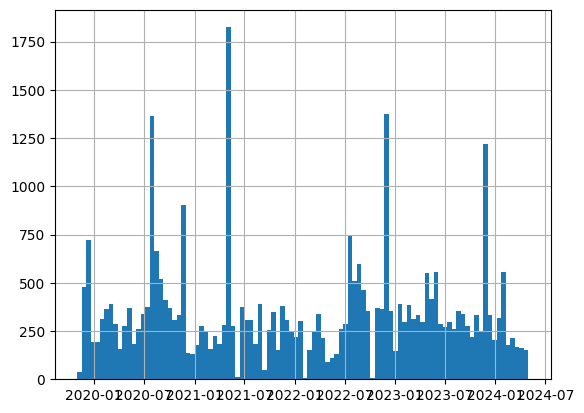

In [23]:
# visualize how much data with created_at as timestamps
df['created_at'].hist(bins=100)

In [6]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1200379450938085376,Fri Nov 29 11:42:17 +0000 2019,0,Siapa yang berasal dari daerah berikut? Bandun...,1200379450938085376,NaN,NaN,in,Serpong,0,0,1,https://twitter.com/KampusGuruCikal/status/120...,2804980657,KampusGuruCikal
1,1200339635320188928,Fri Nov 29 09:04:04 +0000 2019,1,Merdeka Belajar https://t.co/YCE8HyOXBh,1200339635320188928,NaN,NaN,in,Indonesia,0,0,2,https://twitter.com/kompasiana/status/12003396...,23786106,kompasiana
2,1200295713290113024,Fri Nov 29 06:09:33 +0000 2019,5,Guys...guys...guys please ajak aq jalan2x. Aq ...,1200295713290113024,NaN,NaN,in,close enough,0,0,1,https://twitter.com/hannanzdn/status/120029571...,1006556164266516480,hannanzdn
3,1200292966847246336,Fri Nov 29 05:58:38 +0000 2019,0,Mungkin yg dimaksud konsep merdeka belajar ada...,1200292966847246336,NaN,NaN,in,NaN,0,1,0,https://twitter.com/smiertx/status/12002929668...,91778886,smiertx
4,1200270358869204992,Fri Nov 29 04:28:48 +0000 2019,9,Tahun 2020 Sekolah Gratis Tetap Berjalan Sumba...,1200270358869204992,https://pbs.twimg.com/media/EKg3hbuVUAAIUqG.png,NaN,in,Palembang,0,0,6,https://twitter.com/Detiksumsel_/status/120027...,84621673,Detiksumsel_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,1774660062667297256,Mon Apr 01 04:48:25 +0000 2024,0,Benar benar panutan.. sekarang gw berproses ba...,1774660062667297256,NaN,NaN,in,"East Java, Indonesia",0,0,0,https://twitter.com/TrustMe3Buddy/status/17746...,1082587296304553984,TrustMe3Buddy
34594,1774639286459244789,Mon Apr 01 03:25:51 +0000 2024,0,#WhatsOnUnas #UnasNews Jakarta (UNAS) Universi...,1774639286459244789,NaN,NaN,in,"Jakarta, Indonesia",0,0,0,https://twitter.com/UNAS1949/status/1774639286...,56605444,UNAS1949
34595,1774635680515465256,Mon Apr 01 03:11:32 +0000 2024,0,Ide Nadiem mas menteri soal Kampus/Belajar Mer...,1774635680515465256,NaN,NaN,in,"Jakarta, Indonesia",0,0,0,https://twitter.com/indrayanto/status/17746356...,39698859,indrayanto
34596,1774626511745867816,Mon Apr 01 02:35:06 +0000 2024,20,Ekskul Pramuka Gak Lagi Wajib ? Sensasi @nadie...,1774626511745867816,https://pbs.twimg.com/media/GKC9aHPasAAzM_8.jpg,NaN,in,NaN,0,6,6,https://twitter.com/Penyair_Berdiri/status/177...,1240137086331748352,Penyair_Berdiri


In [7]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df.sort_values(by='created_at', inplace=True)
df.reset_index(drop=True, inplace=True)
df.dropna(subset=['created_at'], inplace=True)

In [10]:
df.dropna(subset=['full_text'], inplace=True)

In [11]:
len(df)

34598

# Clean Data

### Slang dan Abreviasi

In [13]:
kamus_slang=pd.read_csv('D:\Dafa\Jupyter\gemasyik\src\kamus_slang.csv')
kamus_slang=kamus_slang.rename(columns = {'slang' : 'kamus_slang' , 'formal' : 'kamus_perbaikan'})
slang_mapping = dict(zip(kamus_slang['kamus_slang'], kamus_slang['kamus_perbaikan']))

kamus_singkatan = pd.read_csv('D:\Dafa\Jupyter\gemasyik\src\kamus_singkatan.csv', header=None, names=['sebelum_perbaikan', 'setelah_perbaikan'],delimiter=';')
singkatan_mapping=dict(zip(kamus_singkatan['sebelum_perbaikan'],kamus_singkatan['setelah_perbaikan']))

### Stopword, emoji, dan Stemmer Factory

In [17]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import  StopWordRemoverFactory
import emoji
from spacy.lang.id import Indonesian
import string

In [18]:
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()
# List of words with negation meaning
data = emoji.EMOJI_DATA

# Remove negation words from stopwords
# stopwords = set(stopwords).difference(excluded_stopwords)
nlp = Indonesian()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [19]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import  StopWordRemoverFactory
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()
# stopwords

In [20]:
def replace_emoji_with_space(text, emoji_data, language='id'):
    for emoji, translations in emoji_data.items():
        if language in translations:
            text = text.replace(emoji, '')
    return text

In [21]:
def process_tweet(tweet) :
  tweet=tweet.lower()
  # link
  tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)

  # spesifik
  # tweet = re.sub(r'\[username\]|\[url\]|\[askmf\]|\[sensitive-no\]|\[satu menit kemudian\]|\[seo in ha, love rain\]|\[bb\]|\[c48\]|\[idm\]', '', tweet)

  # emoji
  tweet=replace_emoji_with_space(tweet,data)
  # tweet=tweet.replace(":",' ').replace('_','mask').replace('-','rus').strip()
  # tweet=re.sub(' +', ' ', tweet)

  # username
  tweet = re.sub('@[^\s]+','',tweet)

  # hashtag
  tweet = re.sub(r'#([^\s]+)', '', tweet)

  # tokenisasi
  tokens = tweet.split()

  tweet_tokens = []
  for ele in tokens:
    ele_kamus = kamus_singkatan.get(ele, ele)
    ele_slang = slang_mapping.get(ele_kamus, ele_kamus)
    tweet_tokens.append(ele_slang)

  tweet = ' '.join(tweet_tokens)
  tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
  tweet = re.sub(r'#([^\s]+)', '', tweet)
  tweet=re.sub(r'\d+', '', tweet)
  tweet = tweet.strip('\'"')
  tweet = tweet.lstrip('\'"')

  tweet = "".join([char for char in tweet if char not in string.punctuation])

  doc = nlp(tweet)

  tokens = [token.text for token in doc]
      # Hapus stopwords dari tokens
  filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
  tweet = ' '.join(filtered_tokens)

  tweet=stemmer.stem(tweet)
  # tweet=tweet.replace('mask',' ').replace('rus','-')

  # hapus kata bijak dan didik
  tweet = re.sub(r'\b(?:bijak|didik)\b', '', tweet)

  # hapus spasi berlebih di awal dan akhir
  tweet = tweet.strip()

  return tweet

In [27]:
process_tweet(df['full_text'][3])

'kbm tl ambengan admin mau share beberapa dokumentasi giat ajar ajar tl ambengan sore tadi anak merdeka tl ambengan ajar seni warna cerita'

In [28]:
df.head(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1190099100865159168,2019-11-01 02:51:51+00:00,0,Mari bekerja belajar dan bersenang senang deng...,1190099100865159168,https://pbs.twimg.com/media/EIQUxW_W4AA_Fzf.jpg,NaN,in,Jakarta,0,1,0,https://twitter.com/zia_rezia/status/119009910...,367453819,zia_rezia
1,1190485486348881920,2019-11-02 04:27:12+00:00,1,Di TPN guru-guru merdeka belajar. Semoga tahun...,1190485486348881920,NaN,NaN,in,indonesia,0,0,0,https://twitter.com/Lily_calla84/status/119048...,385774339,Lily_calla84
2,1190943314008104967,2019-11-03 10:46:27+00:00,2,[KBM AMBENGAN BATU] Mimin mau share beberapa d...,1190943314008104967,https://pbs.twimg.com/media/EIcUbjXWoAI3pAy.jpg,NaN,in,Surabaya,0,0,0,https://twitter.com/SSChildSurabaya/status/119...,311483005,SSChildSurabaya
3,1190944259316142080,2019-11-03 10:50:12+00:00,1,[KBM TL AMBENGAN] Mimin mau share beberapa dok...,1190944259316142080,https://pbs.twimg.com/media/EIcVSlQWoAEof40.jpg,NaN,in,Surabaya,0,0,0,https://twitter.com/SSChildSurabaya/status/119...,311483005,SSChildSurabaya
4,1191002957090717696,2019-11-03 14:43:27+00:00,10,Kt harusnya belajar loyal pada nurani dan piki...,1191002957090717696,NaN,NaN,in,Indonesia,0,1,2,https://twitter.com/rekatindonesia/status/1191...,2563567034,rekatindonesia


In [29]:
process_tweet(df['full_text'][0])

'kerja ajar senang senang penuh semangat merdeka'

In [30]:
df['full_text'] = df['full_text'].apply(lambda x: process_tweet(str(x)))

In [31]:
df.to_csv('cleaned_mb.csv')

In [32]:
(df['full_text'])

0          kerja ajar senang senang penuh semangat merdeka
1        tpn guruguru merdeka ajar moga tahun depan gab...
2        kbm ambengan batu admin mau share beberapa dok...
3        kbm tl ambengan admin mau share beberapa dokum...
4        harus ajar loyal nurani pikir sendiri my heart...
                               ...                        
34593    wakatobi siap gelar konferensi internasional s...
34594                  konsorsium baterai listrik nasional
34595                         joki essay tema merdeka ajar
34596            tim pkm pnup terima dana pkm vokasi tahun
34597    juang anakanak dusun biram aceh utara tempuh m...
Name: full_text, Length: 34598, dtype: object

In [33]:
df.duplicated(subset=['full_text']).sum()

4227